In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

from epf.util import load_and_concat_data, predict_with_timestamps
from epf.config import PROCESSED_DATA_DIR, FeatureConfig

2025-05-16 10:57:10.937 | INFO     | epf.config:<module>:19 - PROJ_ROOT path is: C:\Users\valen\PycharmProjects\epf
2025-05-16 10:57:10.937 | INFO     | epf.config:create_dir:15 - DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data
2025-05-16 10:57:10.938 | INFO     | epf.config:create_dir:15 - RAW_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/raw
2025-05-16 10:57:10.938 | INFO     | epf.config:create_dir:15 - INTERIM_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/interim
2025-05-16 10:57:10.939 | INFO     | epf.config:create_dir:15 - PROCESSED_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed
2025-05-16 10:57:10.939 | INFO     | epf.config:create_dir:15 - TRAIN_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed/train_data
2025-05-16 10:57:10.940 | INFO     | epf.config:create_dir:15 - MODELS_DIR path is: C:/Users/valen/PycharmProjects/epf/models
2025-05-16 10:57:10.940 | INFO     | epf.config:create_dir:15 - PREDICTIONS_D

In [1]:
file_paths = {'de_prices': ['de_prices_2020.csv', 'de_prices_2021.csv', 'de_prices_2022.csv', 'de_prices_2023.csv', 'de_prices_2024.csv']}

COLORS = {
    "blue": "#3a609c",
    "blue_grey": "#69a0cb",
    "light_blue": "#afe1f5",
    "dark_green": "#345c0e",
    "olive": "#74953d",
    "green": "#c0d159",
    "gold": "#ffd700",
    "orange": "#ffb14e",
    "light_orange": "#fa8775",
    "magenta": "#840853",
    "purple": "#ba55aa",
    "light_purple": "#d1a7ef"
}

# avg Weekly volatility de lu prices

In [ ]:
tmp = []

for file_path in file_paths.values():
    col_name = [k for k, v in file_paths.items() if v == file_path]
    data = load_and_concat_data(file_path, col_name[0])
    tmp.append(data)

df = pd.concat(tmp, axis=1)

In [ ]:
df['volatility'] = df['de_prices'].rolling(window=24).std()
df['year'] = df.index.year
df['day'] = [x.strftime('%j') for x in df.index]
df['week'] = [x.strftime('%W') for x in df.index]

In [ ]:
df['mean_price'] = df['de_prices'].rolling(window=24*7).mean()
df['std_dev'] = df['de_prices'].rolling(window=24*7).std()

df['upper_band'] = df['mean_price'] + df['std_dev']
df['lower_band'] = df['mean_price'] - df['std_dev']

sns.set_style('ticks')

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['mean_price'], color=COLORS['magenta'], label='Mean Price')
plt.fill_between(df.index, df['lower_band'], df['upper_band'], color=COLORS['purple'], alpha=0.3, label='Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Price in €/MWh')
plt.legend(loc='upper left')

#plt.title('Average weekly volatility of Prices in DE_LU bidding zone')

#plt.savefig("../reports/figures/volatility.pdf", dpi=300, bbox_inches='tight')

# Normed features

In [3]:
path = PROCESSED_DATA_DIR / "features.csv"
df = pd.read_csv(path, index_col=0, parse_dates=True)

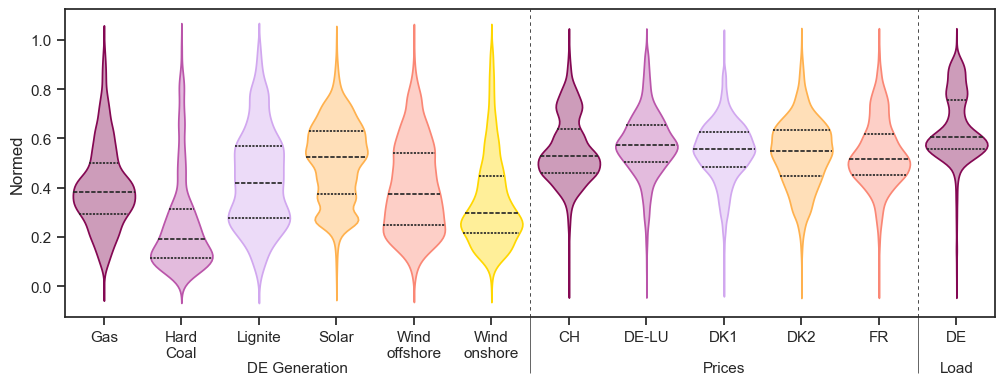

In [204]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("../models/lstm_all_features.pkl", "rb") as f:
    model_obj = pkl.load(f)

train_df = model_obj['train_df']
fs = pd.read_csv("../data/processed/features.csv", index_col=0, parse_dates=True)

feature_set = fs[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'de_load_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal']]
train_df = train_df[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal', 'de_load_rm_seasonal']]

palette = {
    # first palette
    'de_gas_gen_rm_seasonal': COLORS['magenta'],
    'de_hard_coal_gen_rm_seasonal': COLORS['purple'],
    'de_lignite_gen_rm_seasonal': COLORS['light_purple'],
    'de_solar_gen_rm_seasonal': COLORS['orange'],
    'de_wind_gen_offshore_rm_seasonal': COLORS['light_orange'],
    'de_wind_gen_onshore_rm_seasonal': COLORS['gold'],

    # second palette
    'ch_prices_hat_rm_seasonal': COLORS['magenta'],
    'de_prices_hat_rm_seasonal': COLORS['purple'],
    'dk1_prices_hat_rm_seasonal': COLORS['light_purple'],
    'dk2_prices_hat_rm_seasonal': COLORS['orange'],
    'fr_prices_hat_rm_seasonal': COLORS['light_orange'],

    # third palette
    'de_load_rm_seasonal': COLORS['magenta'],
}

labels = {
    #first labels
    'de_solar_gen_rm_seasonal': 'Solar',
    'de_wind_gen_onshore_rm_seasonal': 'Wind\nonshore',
    'de_wind_gen_offshore_rm_seasonal': 'Wind\noffshore',
    'de_hard_coal_gen_rm_seasonal': 'Hard\nCoal',
    'de_lignite_gen_rm_seasonal': 'Lignite',
    'de_gas_gen_rm_seasonal': 'Gas',

    # second labels
    'de_prices_hat_rm_seasonal': 'DE-LU',
    'ch_prices_hat_rm_seasonal': 'CH',
    'dk1_prices_hat_rm_seasonal': 'DK1',
    'dk2_prices_hat_rm_seasonal': 'DK2',
    'fr_prices_hat_rm_seasonal': 'FR',

    # third labels
    'de_load_rm_seasonal': 'DE',
}

train_min = train_df.min()
train_max = train_df.max()

keys = feature_set.keys()

sns.set_style("ticks")

df_std = (feature_set - train_min) / (train_max - train_min)
plt.figure(figsize=(12, 4))

ax = sns.violinplot(data=train_df, inner="quart", palette=palette, saturation=1)
for violin, color in zip(ax.collections[::1], palette.values()):
    facecolor = plt.matplotlib.colors.to_rgba(color, alpha=0.4)
    violin.set_facecolor(facecolor)
    violin.set_edgecolor(color)
#ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xticks(range(len(train_df.columns)))
ax.set_xticklabels([labels[col] for col in train_df.columns])
ax.set_ylabel('Normed')
ax.axvline(x = 5.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)
ax.axvline(x = 10.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)

sec = ax.secondary_xaxis(location=0)
sec.set_xticks(ticks=[2.5, 8, 11], labels=['\nDE Generation', '\nPrices', '\nLoad'])
sec.tick_params('x', length=0, pad=20)
sec.spines["bottom"].set_visible(False)

sec2 = ax.secondary_xaxis(location=0)
sec2.set_xticks(ticks=[5.5, 10.5], labels=[])
sec2.tick_params('x', length=40, width=0.5)
sec2.spines["bottom"].set_visible(False)

plt.savefig("../reports/figures/normed_feature_distribution.svg", dpi=300, bbox_inches='tight')

plt.show()

# Metrics

In [5]:
p

,loss,mean_absolute_error,root_mean_squared_error
shifted_gru_vre_lags,0.102464,0.102464,0.141221
shifted_gru_vre_lags_sl,0.101996,0.101996,0.136720
shifted_lstm_vre_sl,0.094554,0.094554,0.131418
lstm_vre_fossil,0.093533,0.093533,0.132709
lstm_vre_neighboring_prices_sl,0.090918,0.090918,0.130023
shifted_lstm_vre_lags_sl,0.089265,0.089265,0.127132
shifted_lstm_vre,0.088334,0.088334,0.127363
gru_vre_fossil_sl,0.086177,0.086177,0.133389
gru_vre_lags_sl,0.086066,0.086066,0.128997
shifted_lstm_vre_fossil,0.085534,0.085534,0.122321


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'shifted_gru_vre_lags'),
  Text(1, 0, 'shifted_gru_vre_lags_sl'),
  Text(2, 0, 'shifted_lstm_vre_sl'),
  Text(3, 0, 'shifted_lstm_vre_lags_sl'),
  Text(4, 0, 'shifted_lstm_vre'),
  Text(5, 0, 'shifted_lstm_vre_fossil'),
  Text(6, 0, 'shifted_lstm_vre_lags'),
  Text(7, 0, 'shifted_gru_vre_sl'),
  Text(8, 0, 'shifted_gru_vre'),
  Text(9, 0, 'shifted_lstm_vre_fossil_sl'),
  Text(10, 0, 'shifted_gru_vre_fossil_sl'),
  Text(11, 0, 'shifted_gru_vre_fossil'),
  Text(12, 0, 'shifted_gru_vre_all_features_sl'),
  Text(13, 0, 'shifted_lstm_vre_all_features'),
  Text(14, 0, 'shifted_gru_vre_all_features'),
  Text(15, 0, 'shifted_lstm_vre_neighboring_prices'),
  Text(16, 0, 'shifted_lstm_vre_all_features_sl'),
  Text(17, 0, 'shifted_gru_vre_neighboring_prices_sl'),
  Text(18, 0, 'shifted_lstm_vre_neighboring_prices_sl'),
  Text(19, 0, 'shifted_gru_vre_neighboring_prices')])

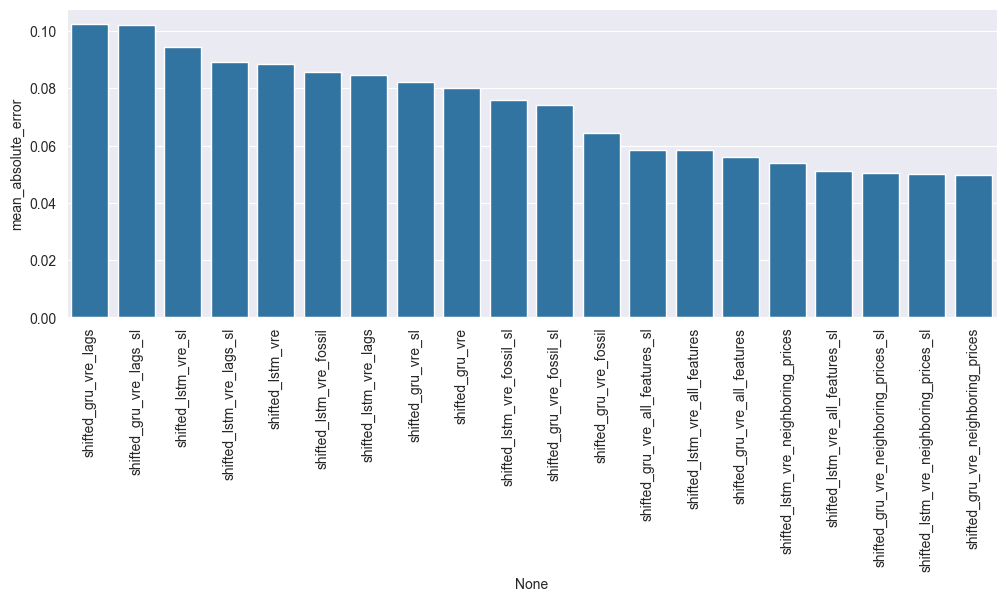

In [8]:
import pickle as pkl
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

with open("../data/processed/performance.pkl", "rb") as f:
    performance = pkl.load(f)

drop_cols = [col for col in performance.keys() if not col.startswith('shifted')]
p = pd.DataFrame(performance).drop(columns=drop_cols).T.sort_values('mean_absolute_error', ascending=False)

plt.figure(figsize=(12, 4))

sns.barplot(data=p, x=p.index, y='mean_absolute_error')
plt.xticks(rotation=90)

In [9]:
p.round(4)

,loss,mean_absolute_error,root_mean_squared_error
shifted_gru_vre_lags,0.1025,0.1025,0.1412
shifted_gru_vre_lags_sl,0.1020,0.1020,0.1367
shifted_lstm_vre_sl,0.0946,0.0946,0.1314
shifted_lstm_vre_lags_sl,0.0893,0.0893,0.1271
shifted_lstm_vre,0.0883,0.0883,0.1274
shifted_lstm_vre_fossil,0.0855,0.0855,0.1223
shifted_lstm_vre_lags,0.0847,0.0847,0.1236
shifted_gru_vre_sl,0.0822,0.0822,0.1142
shifted_gru_vre,0.0800,0.0800,0.1155
shifted_lstm_vre_fossil_sl,0.0760,0.0760,0.1095


### naive forecast

In [10]:
import pickle as pkl
import pandas as pd

with open("../models/lstm_vre.pkl", "rb") as f:
    model_obj = pkl.load(f)

train_df = model_obj['train_df']
validation_df = model_obj['validation_df']
test_df = model_obj['test_df']

inputs = pd.concat([train_df, validation_df, test_df], axis=0)

true_normed = inputs['de_prices_hat_rm_seasonal']
naive_normed = true_normed.shift(24*7)

naive_mae_normed = (true_normed - naive_normed).abs().mean()
naive_rmse_normed = ((true_normed - naive_normed) ** 2).mean() ** 0.5

# denormalize and add seasonal component to the data
t_max = model_obj['train_max']
t_min = model_obj['train_min']
mstl = model_obj['seasonal']
inputs = (inputs * (t_max - t_min)) + t_min

periods = [24, 168]

for col in inputs.columns:
    if col in mstl:
        inputs[col.replace('_rm_seasonal', '')] = (inputs[col] - sum(mstl[col].seasonal[f'seasonal_{p}'] for p in periods))
        inputs.drop(columns=[col], inplace=True)

inputs.rename(columns={'de_prices_hat':'de_prices'}, inplace=True)

true = inputs['de_prices']
naive = true.shift(24*7)  # shift by one week to get the naive forecast

naive_mae = (true - naive).abs().mean()
naive_rmse = ((true - naive) ** 2).mean() ** 0.5

2025-05-30 16:00:45.754 | INFO     | epf.config:<module>:19 - PROJ_ROOT path is: C:\Users\valen\PycharmProjects\epf
2025-05-30 16:00:45.754 | INFO     | epf.config:create_dir:15 - DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data
2025-05-30 16:00:45.754 | INFO     | epf.config:create_dir:15 - RAW_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/raw
2025-05-30 16:00:45.754 | INFO     | epf.config:create_dir:15 - INTERIM_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/interim
2025-05-30 16:00:45.769 | INFO     | epf.config:create_dir:15 - PROCESSED_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed
2025-05-30 16:00:45.769 | INFO     | epf.config:create_dir:15 - TRAIN_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed/train_data
2025-05-30 16:00:45.769 | INFO     | epf.config:create_dir:15 - MODELS_DIR path is: C:/Users/valen/PycharmProjects/epf/models
2025-05-30 16:00:45.769 | INFO     | epf.config:create_dir:15 - PREDICTIONS_D

In [11]:
print(f'Naive MAE normed: {naive_mae_normed.round(4)}')
print(f'Naive RMSE normed: {naive_rmse_normed.round(4)}\n')
print(f'Naive MAE: {naive_mae.round(4)}')
print(f'Naive RMSE: {naive_rmse.round(4)}')

Naive MAE normed: 0.1283
Naive RMSE normed: 0.1909

Naive MAE: 32.4491
Naive RMSE: 47.0011


### absolute error over time

retrieve the predictions, maybe group them by day/week/month to see error at different points in time

In [12]:
import pandas as pd
import pickle as pkl
from epf.util import predict_with_timestamps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

with open("../models/shifted_lstm_vre.pkl", "rb") as f:
    lstm_model_obj = pkl.load(f)

with open("../models/shifted_gru_vre.pkl", "rb") as f:
    gru_model_obj = pkl.load(f)

lstm_preds, lstm_trues = predict_with_timestamps(lstm_model_obj)
gru_preds, gru_trues = predict_with_timestamps(gru_model_obj)

In [109]:
# create a naive forecast by forecasting at each hour the price of the same hour from the previous week and flatten the naive predictions into one row of the dataframe making each row of the df a 24 hour forecast
y = inputs['de_prices']

horizons = range(1, 25)
col_names = [f't+{h}' for h in horizons]

naive_hourly = pd.DataFrame(index=y.index, columns=col_names)
naive_hourly_true = pd.DataFrame(index=y.index, columns=col_names)

# fill the naive predictions with the prices of the same hour from the previous week, each forecast is a row in the dataframe
for h in horizons:
    shift_amount = 168 - h  # 168 hours = 1 week
    naive_hourly[f't+{h}'] = y.shift(shift_amount)
    naive_hourly_true[f't+{h}'] = y.shift(-h)

start = lstm_preds.index[0]
end = lstm_preds.index[-1]

# remove the timezone awarenss from the index
naive_hourly.index = naive_hourly.index.tz_localize(None)
naive_hourly_true.index = naive_hourly_true.index.tz_localize(None)

naive_hourly = naive_hourly.loc[start:end]
naive_hourly_true = naive_hourly_true.loc[start:end]

In [110]:
# unify colnames of the dataframes
lstm_preds.columns = [f'lstm_preds_{col.split("_")[-1]}' for col in lstm_preds.columns]
lstm_trues.columns = [f'lstm_trues_{col.split("_")[-1]}' for col in lstm_trues.columns]
gru_preds.columns = [f'gru_preds_{col.split("_")[-1]}' for col in gru_preds.columns]
gru_trues.columns = [f'gru_trues_{col.split("_")[-1]}' for col in gru_trues.columns]
naive_hourly.columns = [f'naive_{col}' for col in naive_hourly.columns]
naive_hourly_true.columns = [f'naive_true_{col}' for col in naive_hourly_true.columns]

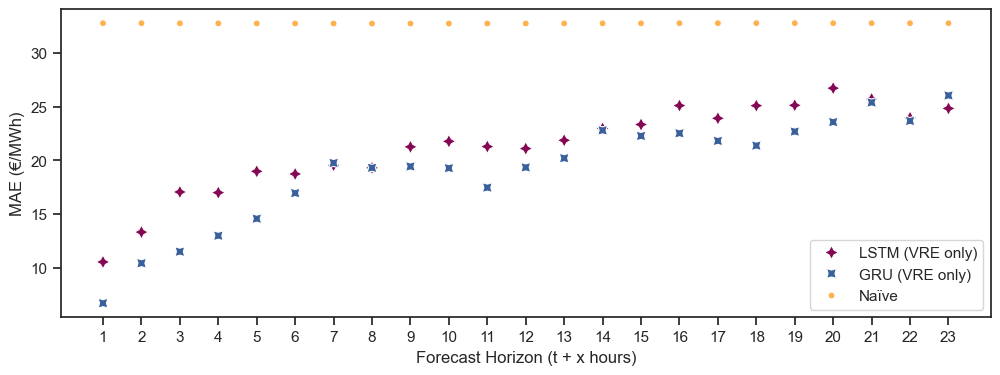

In [111]:
# calculate the mean absolute error for each horizon for lstm, gru and naive forecasts
lstm_mae_per_horizon = np.mean(np.abs(lstm_trues.iloc[:, :].values - lstm_preds.iloc[:, :].values), axis=0)
gru_mae_per_horizon = np.mean(np.abs(gru_trues.iloc[:, :].values - gru_preds.iloc[:, :].values), axis=0)
naive_mae_per_horizon = np.mean(np.abs(naive_hourly_true.iloc[:, :].values - naive_hourly.iloc[:, :].values), axis=0)

data = pd.DataFrame({
    'LSTM (VRE only)': lstm_mae_per_horizon,
    'GRU (VRE only)': gru_mae_per_horizon,
    'Naïve': naive_mae_per_horizon})

palette = {
    'LSTM (VRE only)': COLORS['magenta'],
    'GRU (VRE only)': COLORS['blue'],
    'Naïve': COLORS['orange']
}

data.dropna(inplace=True)

sns.set_style('ticks')

plt.figure(figsize=(12, 4))
sns.scatterplot(data, palette=palette, markers=[(4,1,0), (4,1,45), '.'], s=100)
plt.xlabel("Forecast Horizon (t + x hours)")
plt.ylabel("MAE (€/MWh)")
#plt.title("MAE by Forecast Horizon")
plt.xticks(range(0, 23), [h+1 for h in range(0, 23)])

plt.savefig("../reports/figures/mae_by_horizon.pdf", dpi=300, bbox_inches='tight')

plt.show()

In [112]:
# unify dataframe and rename columns
lstm_errors = pd.DataFrame(np.abs(lstm_trues.iloc[:, :].values - lstm_preds.iloc[:, :].values),
                           columns=[f'lstm_error_{col.split("_")[-1]}' for col in lstm_preds.columns])
gru_errors = pd.DataFrame(np.abs(gru_trues.iloc[:, :].values - gru_preds.iloc[:, :].values),
                          columns=[f'gru_error_{col.split("_")[-1]}' for col in gru_preds.columns])
naive_errors = pd.DataFrame(np.abs(naive_hourly_true.iloc[:, :].values - naive_hourly.iloc[:, :].values),
                            columns=[f'naive_error_{col.split("_")[-1]}' for col in naive_hourly.columns])

df = pd.concat([lstm_errors, gru_errors, naive_errors], axis=1)
df['lstm_error_mean'] = df[[col for col in df.columns if col.startswith('lstm_error_')]].mean(axis=1)
df['gru_error_mean'] = df[[col for col in df.columns if col.startswith('gru_error_')]].mean(axis=1)
df['naive_error_mean'] = df[[col for col in df.columns if col.startswith('naive_')]].mean(axis=1)
df.index = lstm_preds.index
df.dropna(inplace=True)

In [113]:
import holidays

# supplementary data
df['hour'] = df.index.hour
df['day'] = df.index.day
df['day_string'] = [x.strftime('%a') for x in df.index]
df['month'] = df.index.month
df['month_string'] = [x.strftime('%b') for x in df.index]
df['year'] = df.index.year
df['week'] = [x.strftime('%W') for x in df.index]
df['season'] = [
    'Winter' if x.month in [12, 1, 2] else
    'Spring' if x.month in [3, 4, 5] else
    'Summer' if x.month in [6, 7, 8] else
    'Autumn' for x in df.index
]
de_holidays = holidays.country_holidays('DE', years=[2023,2024])
# set holiday to 1 if it is a holiday else 0
df['holiday'] = df.index.to_series().apply(lambda x: "Holiday" if x in de_holidays else "No holiday")

C:\Users\valen\AppData\Local\Temp\ipykernel_16372\663153452.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['season', 'model', 'hour'], as_index=False)


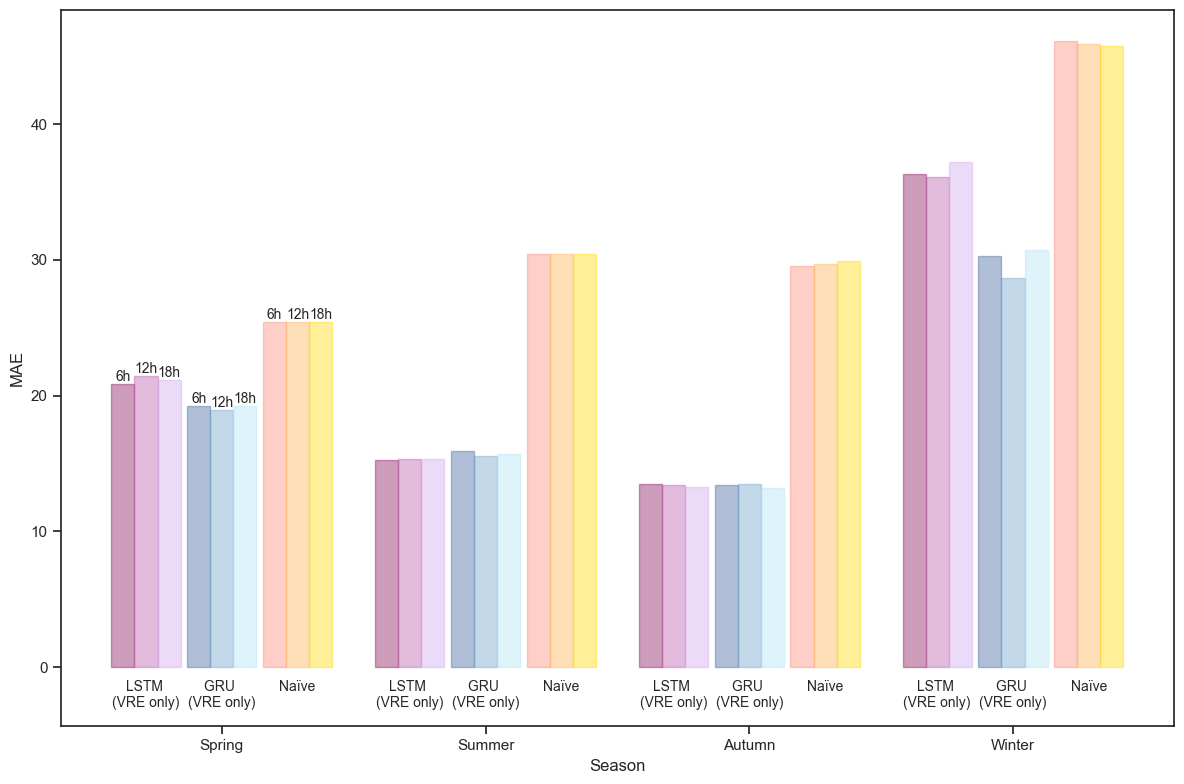

In [18]:
# melt wide format to long format
melted = df.melt(
    id_vars=['season', 'hour'],
    value_vars=['lstm_error_mean', 'gru_error_mean', 'naive_error_mean'],
    var_name='model',
    value_name='error'
)
melted['model'] = melted['model'].str.replace('_error_mean', '')
melted['model'] = melted['model'].str.replace('lstm', 'LSTM (VRE only)').str.replace('gru', 'GRU (VRE only)').str.replace('naive', 'Naïve')

# filter original df
target_hours = [6, 12, 18]
melted = melted[melted['hour'].isin(target_hours)]

season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
melted['season'] = pd.Categorical(melted['season'], categories=season_order, ordered=True)
melted = melted.sort_values(['season', 'model', 'hour'])

# aggregate by season, model, and hour
agg_df = (
    melted
    .groupby(['season', 'model', 'hour'], as_index=False)
    .agg({'error': 'mean'})
)

# ordering help
model_order = ['LSTM (VRE only)', 'GRU (VRE only)', 'Naïve']
hour_order = [6, 12, 18]
bar_order = [(model, hour) for model in model_order for hour in hour_order]

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(12, 8))

seasons = season_order
x = np.array([0, 0.8, 1.6, 2.4])
bar_width = 0.07
group_gap = 0.02
model_group_width = 3 * bar_width
group_width = 3 * model_group_width + 2 * group_gap

# Color mapping
color_keys = {
    ('LSTM (VRE only)', 6): 'magenta',
    ('LSTM (VRE only)', 12): 'purple',
    ('LSTM (VRE only)', 18): 'light_purple',
    ('GRU (VRE only)', 6): 'blue',
    ('GRU (VRE only)', 12): 'blue_grey',
    ('GRU (VRE only)', 18): 'light_blue',
    ('Naïve', 6): 'light_orange',
    ('Naïve', 12): 'orange',
    ('Naïve', 18): 'gold'
}

# Plot each bar
for i, season in enumerate(seasons):
    for mi, model in enumerate(model_order):
        for hi, hour in enumerate(hour_order):
            j = mi * 3 + hi
            # new x: start of season group + model group offset + hour offset
            bar_x = (
                x[i]
                - group_width / 2
                + mi * (model_group_width + group_gap)
                + (hi + 0.5) * bar_width
            )
            val = agg_df[
                (agg_df['season'] == season) &
                (agg_df['model'] == model) &
                (agg_df['hour'] == hour)
            ]['error'].values[0]
            color = COLORS[color_keys[(model, hour)]]
            ax.bar(
                bar_x, val,
                width=bar_width,
                color=color,
                edgecolor=color,
                alpha=0.4,
                linewidth=1,
                label=f"{model} {hour}h" if i == 0 else None
            )
            # hour label above bar
            if i == 0:  # only label the first season and the first model
                ax.text(
                    bar_x, val + 0.002,
                    f"{hour}h",
                    ha='center', va='bottom',
                    fontsize=10
                )

# labels for model groups
ymin, ymax = ax.get_ylim()
label_y = ymin - 0.05 * (ymax - ymin)
for i, season in enumerate(seasons):
    for mi, model in enumerate(model_order):
        # center of model group
        start = (
            x[i]
            - group_width / 2
            + mi * (model_group_width + group_gap)
            + 1.5 * bar_width
        )
        text = model.replace('(', '\n(') if '(' in model else model
        ax.text(
            start, label_y * 0.4,
            text,
            ha='center',
            va='top',
            fontsize=10
        )

ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.set_ylabel("MAE (€/MWh)")
ax.set_xlabel("Season")
ax.set_ylim(bottom=label_y * 1.8)
plt.tight_layout()

plt.savefig("../reports/figures/mae_by_season_and_hour.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [159]:
cols = ['lstm_error', 'gru_error', 'naive_error']

def get_hour_errors(df, block_prefix, target_hour):
    cols = [f"{block_prefix}_t+{i}" for i in range(1,25)]
    mat = df[cols].values
    origin = df.index.hour
    horizons = ((target_hour - origin - 1) % 24) + 1
    errs = mat[np.arange(len(df)), horizons - 1]
    return pd.Series(errs, index=df.index, name=f"{block_prefix}_hour_{target_hour}")

results = {}
for model in cols:
    for h in range(24):
        results[f"{model}_{h}"] = get_hour_errors(df, model, h)

hourly_errors = pd.DataFrame(results)
hourly_errors

,lstm_error_0,lstm_error_1,lstm_error_2,lstm_error_3,lstm_error_4,lstm_error_5,lstm_error_6,lstm_error_7,lstm_error_8,lstm_error_9,...,naive_error_14,naive_error_15,naive_error_16,naive_error_17,naive_error_18,naive_error_19,naive_error_20,naive_error_21,naive_error_22,naive_error_23
2024-01-02 05:00:00,73.635269,71.818657,67.703648,56.583950,57.438789,58.623398,35.153744,28.862999,19.020638,16.541092,...,62.122601,26.793091,19.369907,9.166949,5.228501,1.155732,7.308750,14.857933,42.370285,36.064360
2024-01-02 06:00:00,73.542564,66.201225,65.021145,52.975025,45.410805,49.716469,52.077618,1.386909,1.969238,8.138779,...,62.122601,26.793091,19.369907,9.166949,5.228501,1.155732,7.308750,14.857933,42.370285,36.064360
2024-01-02 07:00:00,71.490974,66.413147,61.350864,53.248257,46.147163,43.571899,49.621037,23.941536,1.732574,0.870293,...,62.122601,26.793091,19.369907,9.166949,5.228501,1.155732,7.308750,14.857933,42.370285,36.064360
2024-01-02 08:00:00,72.474281,67.497574,65.419033,54.132893,52.058380,50.685562,50.319798,28.667023,12.634605,1.114311,...,62.122601,26.793091,19.369907,9.166949,5.228501,1.155732,7.308750,14.857933,42.370285,36.064360
2024-01-02 09:00:00,70.880867,68.292595,66.145969,57.911030,52.415436,56.112793,56.710575,28.955292,16.678040,13.976944,...,62.122601,26.793091,19.369907,9.166949,5.228501,1.155732,7.308750,14.857933,42.370285,36.064360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 18:00:00,2.395172,5.017113,12.799171,11.634605,15.145538,19.296959,16.025436,15.986626,10.504898,10.334213,...,54.042363,66.707568,68.970102,44.990595,31.690373,31.576069,28.218959,36.482341,23.954077,8.707661
2024-12-30 19:00:00,4.284096,8.051781,12.754532,17.536247,16.642471,15.920364,17.523132,19.951569,15.877884,16.139809,...,54.042363,66.707568,68.970102,44.990595,31.690373,2.495066,28.218959,36.482341,23.954077,8.707661
2024-12-30 20:00:00,8.847908,8.683380,14.193504,15.974976,21.057030,16.007820,12.557106,20.195663,19.165131,20.221596,...,54.042363,66.707568,68.970102,44.990595,31.690373,2.495066,18.277016,36.482341,23.954077,8.707661
2024-12-30 21:00:00,4.219376,13.479546,15.220985,17.362022,19.473038,20.398575,12.617607,15.014282,19.481239,23.826408,...,54.042363,66.707568,68.970102,44.990595,31.690373,2.495066,18.277016,21.451764,23.954077,8.707661


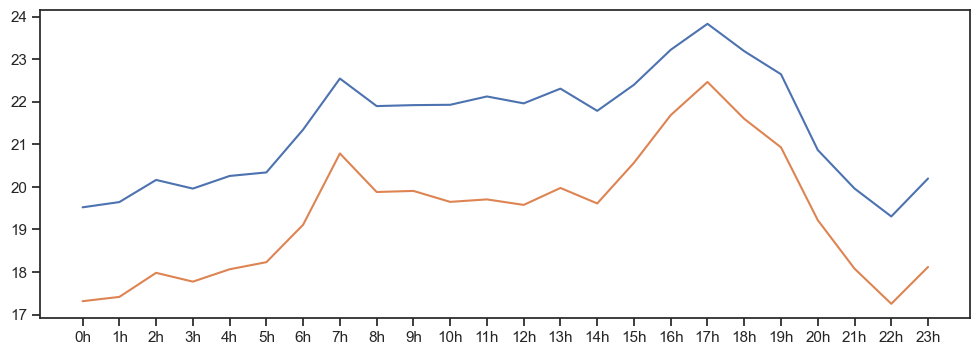

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")

mean_errors_by_hour = hourly_errors.mean(axis=0).to_frame()
mean_errors_by_hour_lstm = mean_errors_by_hour.loc[[f'lstm_error_{h}' for h in range(24)]]
mean_errors_by_hour_gru = mean_errors_by_hour.loc[[f'gru_error_{h}' for h in range(24)]]

mean_errors_by_hour_lstm.index = [f'{h}h' for h in range(24)]
mean_errors_by_hour_gru.index = [f'{h}h' for h in range(24)]

plt.figure(figsize=(12, 4))

plt.plot(mean_errors_by_hour_lstm)
plt.plot(mean_errors_by_hour_gru)

weather based analysis

In [114]:
ghi = pd.read_csv("../data/raw/de_global_horizontal_irradiation_2024.csv", skiprows=6, parse_dates=True, index_col=1)
ws = pd.read_csv("../data/raw/de_wind_speed_100_2024.csv", skiprows=6, parse_dates=True, index_col=1)
ghi_avg = ghi.pivot(columns='location_id', values='shortwave_radiation (W/m²)').mean(axis=1).rename('ghi_avg')
ws_avg = ws.pivot(columns='location_id', values='wind_speed_100m (km/h)').mean(axis=1).rename('ws_avg')

# normalize the data
ghi_avg = (ghi_avg - ghi_avg.min()) / (ghi_avg.max() - ghi_avg.min())
ws_avg = (ws_avg - ws_avg.min()) / (ws_avg.max() - ws_avg.min())

weather_df = ghi_avg + ws_avg
weather_df = (weather_df - weather_df.min()) / (weather_df.max() - weather_df.min())
weather_df = weather_df.to_frame().rename(columns={0: 'weather_index'})
weather_df = (weather_df * 100).round(0)

In [115]:
extended_df = df.join(weather_df, how='inner')

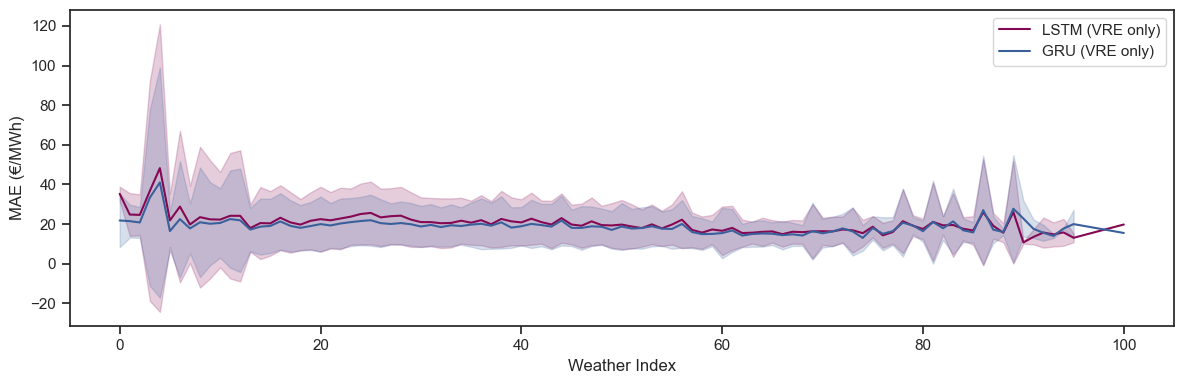

In [116]:
df_weather_plot = extended_df[['weather_index', 'lstm_error_mean', 'gru_error_mean', 'naive_error_mean']].groupby('weather_index').mean().reset_index()

sns.set_style('ticks')

plt.figure(figsize=(12, 4))

sns.lineplot(data=extended_df, x='weather_index', y='lstm_error_mean', label='LSTM (VRE only)', color=COLORS['magenta'], errorbar='sd')
sns.lineplot(data=extended_df, x='weather_index', y='gru_error_mean', label='GRU (VRE only)', color=COLORS['blue'], errorbar='sd')
#sns.lineplot(data=extended_df, x='weather_index', y='naive_error_mean', label='Naïve', color=COLORS['orange'], errorbar='sd')

plt.ylabel('MAE (€/MWh)')
plt.xlabel('Weather Index')
plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig('../reports/figures/error_distribution_by_weather_measure.pdf', dpi=300, bbox_inches='tight')

vre load vs error

In [117]:
df = extended_df

In [118]:
vre_load = pd.read_csv("../data/raw/de_vre_gen_2024.csv", parse_dates=True, index_col=0, skiprows=lambda x: x in [1]).rolling(window=24).mean()
vre_load = vre_load[::4].sum(axis=1).rename('vre_load')
vre_load.index = vre_load.index.tz_localize(None)

In [119]:
extended_df = df.join(vre_load, how='inner')

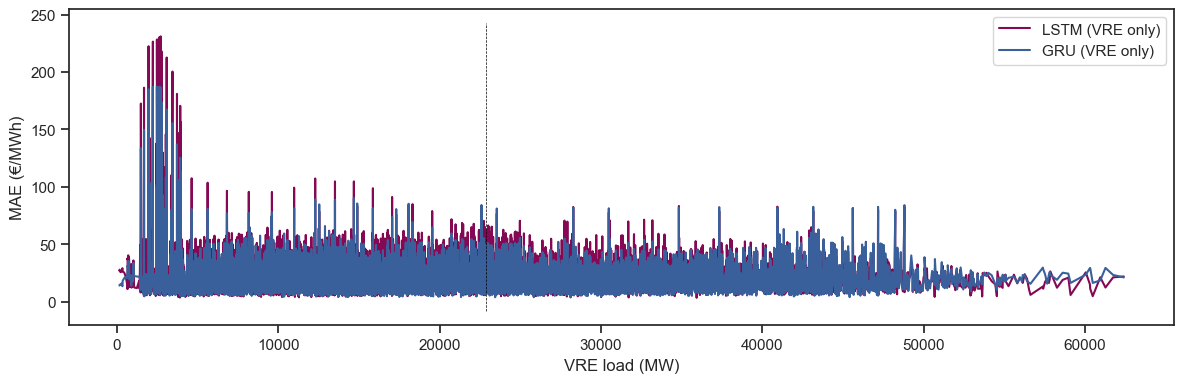

In [120]:
df_vre_plot = extended_df[['vre_load', 'lstm_error_mean', 'gru_error_mean', 'naive_error_mean']].groupby('vre_load').mean().reset_index()

sns.set_style('ticks')

plt.figure(figsize=(12, 4))

sns.lineplot(data=extended_df, x='vre_load', y='lstm_error_mean', label='LSTM (VRE only)', color=COLORS['magenta'], errorbar='sd')
sns.lineplot(data=extended_df, x='vre_load', y='gru_error_mean', label='GRU (VRE only)', color=COLORS['blue'], errorbar='sd')
#sns.lineplot(data=extended_df, x='vre_load', y='naive_error_mean', label='Naïve', color=COLORS['orange'], errorbar='sd')

ymin, ymax = plt.ylim()

plt.vlines(x=extended_df['vre_load'].mean(), ymin=ymin, ymax=ymax, color='black', linestyle='--', linewidth=0.5)

plt.ylabel('MAE (€/MWh)')
plt.xlabel('VRE load (MW)')
plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig('../reports/figures/error_distribution_by_vre_load.pdf', dpi=300, bbox_inches='tight')

### Diebold Mariano Test

In [24]:
import pickle as pkl
import pandas as pd
import numpy as np

models = {
    # LSTM
    # single layer
    'lstm_vre_sl': 'LSTM VRE SL',
    'lstm_vre_fossil_sl': 'LSTM VRE fossil SL',
    'lstm_vre_lags_sl': 'LSTM VRE lags SL',
    'lstm_vre_neighboring_prices_sl': 'LSTM VRE neighboring prices SL',
    'lstm_all_features_sl': 'LSTM all features SL',

    # multi layer
    'lstm_vre': 'LSTM VRE',
    'lstm_vre_fossil': 'LSTM VRE fossil',
    'lstm_vre_lags': 'LSTM VRE lags',
    'lstm_vre_neighboring_prices': 'LSTM VRE neighboring prices',
    'lstm_all_features': 'LSTM all features',

    # GRU
    # single layer
    'gru_vre_sl': 'GRU VRE SL',
    'gru_vre_fossil_sl': 'GRU VRE fossil SL',
    'gru_vre_lags_sl': 'GRU VRE lags SL',
    'gru_vre_neighboring_prices_sl': 'GRU VRE neighboring prices SL',
    'gru_all_features_sl': 'GRU all features SL',

    # multi layer
    'gru_vre': 'GRU VRE',
    'gru_vre_fossil': 'GRU VRE fossil',
    'gru_vre_lags': 'GRU VRE lags',
    'gru_vre_neighboring_prices': 'GRU VRE neighboring prices',
    'gru_all_features': 'GRU all features',
}

# ----------------------------------------------------------------- #
# dict to hold the model name and the returned predictions
data = {}

# ----------------------------------------------------------------- #
# Load models and predictions and their true values
for key, name in models.items():
    path = f"../models/{key}.pkl"
    with open(path, "rb") as f:
        model_obj = pkl.load(f)

    preds, _ = predict_with_timestamps(model_obj)

    # reshape data to fit dm specification of (n_days, n_prices_per_day)
    preds = preds.T.groupby(pd.Grouper(freq='D')).mean().rename(columns= {'mean':name})

    data.update({name: preds,})

# ----------------------------------------------------------------- #
# Create naive model and forecasts and True values
with open("../models/lstm_vre.pkl", "rb") as f:
    model_obj = pkl.load(f)

train_df = model_obj['train_df']
validation_df = model_obj['validation_df']
test_df = model_obj['test_df']

raw = pd.concat([train_df, validation_df, test_df], axis=0)

# create a naive forecast by forecasting at each hour the price of the same hour from the previous week and flatten the naive predictions into one row of the dataframe making each row of the df a 24 hour forecast
y = raw['de_prices_hat_rm_seasonal']

horizons = range(1, 25)
col_names = [f't+{h}' for h in horizons]

naive_hourly = pd.DataFrame(index=y.index, columns=col_names)
true = pd.DataFrame(index=y.index, columns=col_names)

# fill the naive predictions with the prices of the same hour from the previous week, each forecast is a row in the dataframe
for h in horizons:
    shift_amount = 168 - h  # 168 hours = 1 week
    naive_hourly[f't+{h}'] = y.shift(shift_amount)
    true[f't+{h}'] = y.shift(-h)

start = data.get('LSTM VRE').index[0]
end = data.get('LSTM VRE').index[-1]

# remove the timezone awareness from the index
naive_hourly.index = naive_hourly.index.tz_localize(None)
true.index = true.index.tz_localize(None)

naive_hourly = naive_hourly.loc[start:end]
true = true.loc[start:end]

# reshape data to fit dm specification of (n_days, n_prices_per_day)
naive_hourly = naive_hourly.T.groupby(pd.Grouper(freq='D')).mean().rename(columns= {'mean':'Naïve'})
true = true.T.groupby(pd.Grouper(freq='D')).mean().rename(columns= {'mean':'True'})

data.update({
    'Naïve': naive_hourly,
    'True': true,
})

forecasts = pd.DataFrame(data, index=data.get('LSTM VRE').index)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

univariate DM test (compare LSTM and GRU VRE only (single- and multi-layer) agianst each other and against naive for each hour of the forecasting horizon)

In [ ]:
from epf.dm import DM

forecast_subset = forecasts[['LSTM VRE SL', 'LSTM VRE', 'GRU VRE SL', 'GRU VRE', 'Naïve']]
p_values_univariate = {}
true = data.get('True')

for model1 in forecast_subset.columns:
    for model2 in forecast_subset.columns:
        if model1 == model2:
            p_values_univariate.update({'m1': model1, 'm2': model2, 'p': 1})
        else:
            p = DM(p_real=true,
                   p_pred_1=model1,
                   p_pred_2=model2,
                   norm=1,
                   version='univariate')
            p_values_univariate.update({'m1': model1, 'm2': model2, 'p': p})

multivariate DM test (each model gets compared against all other models, but only for the entire forecasting horizon and not each hour)

In [ ]:
from epf.dm import DM

p_values = pd.DataFrame(index=forecasts.columns, columns=forecasts.columns)

for model1 in forecasts.columns:
    for model2 in forecasts.columns:
        # For the diagonal elemnts representing comparing the same model we directly set a
        # p-value of 1
        if model1 == model2:
            p_values.loc[model1, model2] = 1
        else:
            p_values.loc[model1, model2] = DM(p_real=real_price.values.reshape(-1, 24),
                                              p_pred_1=forecasts.loc[:, model1].values.reshape(-1, 24),
                                              p_pred_2=forecasts.loc[:, model2].values.reshape(-1, 24),
                                              norm=1, version='multivariate')

p_values

### timings

In [106]:
import pickle as pkl
import json

models = {
    # VRE
    'lstm_vre_sl': 'LSTM VRE SL',
    'lstm_vre': 'LSTM VRE',
    'gru_vre_sl': 'GRU VRE SL',
    'gru_vre': 'GRU VRE',

    # explanatory variables sl
    'lstm_vre_fossil_sl': 'LSTM VRE fossil SL',
    'lstm_vre_lags_sl': 'LSTM VRE lags SL',
    'lstm_vre_neighboring_prices_sl': 'LSTM VRE neighboring prices SL',
    'lstm_all_features_sl': 'LSTM all features SL',

    'gru_vre_fossil_sl': 'GRU VRE fossil SL',
    'gru_vre_lags_sl': 'GRU VRE lags SL',
    'gru_vre_neighboring_prices_sl': 'GRU VRE neighboring prices SL',
    'gru_all_features_sl': 'GRU all features SL',

    # explanatory variables ml
    'lstm_vre_fossil': 'LSTM VRE fossil',
    'lstm_vre_lags': 'LSTM VRE lags',
    'lstm_vre_neighboring_prices': 'LSTM VRE neighboring prices',
    'lstm_all_features': 'LSTM all features',

    'gru_vre_fossil': 'GRU VRE fossil',
    'gru_vre_lags': 'GRU VRE lags',
    'gru_vre_neighboring_prices': 'GRU VRE neighboring prices',
    'gru_all_features': 'GRU all features',
}

for model_key, model_name in models.items():
    path = f"../models/{model_key}.pkl"
    with open(path, "rb") as f:
        models.update({model_key: pkl.load(f)})

timings = {}

for model_key, model_obj in models.items():
    timings.update({model_obj['model_name']: model_obj['timings']})

with open('../models/timings.json', 'w') as f:
    json.dump(timings, f)